In [227]:
import urllib.request
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB 
from sklearn.linear_model import Perceptron
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
from pymystem3 import Mystem
from stop_words import get_stop_words
from transformers import pipeline

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [231]:
!pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/96/23/18b9c16c18a77755e7f15173821c7100f11e6b3b7717bea8d729bdeb92c0/torch-2.2.2-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/01/f3/936e209267d6ef7510322191003885de524fc48d1b43269810cd589ceaf5/typing_extensions-4.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 7.4 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1


In [171]:
iam = 't1.9euelZqUlYyZycmXzpvIk52QxpjMne3rnpWazZPMj8yLi82NjcaXyo6OzJrl8_cRWSlP-e9AISQo_d3z91EHJ0_570AhJCj9zef1656Vmomai82cjZGKjImWiZGOkcye7_zF656Vmomai82cjZGKjImWiZGOkcye.IAZkYYqmib4lBTnOGYY13YcxA3jmPQKw8lfBuTeGyrAJVZf72LaEZxd9E4NAHnOj494veOV4HC23yoh6keH0Bw'
folder = 'b1gv6dqj1vfsrufpk96p'



In [222]:
request = {
  "modelUri": "gpt://b1gv6dqj1vfsrufpk96p/yandexgpt-lite",
  "completionOptions": {
    "stream": False,
    "temperature": 0.3,
    "maxTokens": "2000"
  },
  "messages": [
    {
      "role": "system",
      "text": "Перепиши текст с использоанием современной лексики, сохранив смысл и длинну текста"
    },
    {
      "role": "user",
      "text": "Московский квартал 2.\\nШумно : летом по ночам дикие гонки. Грязно : кругом стройки, невозможно открыть окна (16 этаж! ), вечно по району летает мусор. Детские площадки убогие, на большой площади однотипные конструкции. Очень дорогая коммуналка. Часто срабатывает пожарная сигнализация. Жильцы уже не реагируют. В это время, обычно около часа, не работают лифты. Из плюсов - отличная планировка квартир ( Московская 194 ), на мой взгляд. Ремонт от застройщика на 3-. Окна вообще жуть - вместо вентиляции. По соотношению цена/качество - 3."
    }
  ]
};

h = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer ' + iam,
    'x-folder-id': folder
}


In [223]:
r = requests.post('https://llm.api.cloud.yandex.net/foundationModels/v1/completion', json=request, headers=h)

In [224]:
r.status_code

200

In [225]:
r.json()

{'result': {'alternatives': [{'message': {'role': 'assistant',
     'text': 'Московский квартал 2.\n\nШумно: летом по ночам нелегальные уличные гонки. Неблагоустроенно: повсюду стройки, окна (вот он, 16 этаж!) невозможно открыть, строительный мусор постоянно летает по району. Детские площадки неухоженные, на большой территории одинаковые площадки. Очень высокие коммунальные платежи. Пожарная сигнализация срабатывает регулярно, но жильцы уже не реагируют. Как правило, в это время, около часа, перестают работать лифты.\n\nИз преимуществ — отличная планировка квартир (по-моему, сталинская застройка 1940-х), ремонт от застройщика на троечку. Окна, как способ вентиляции, вызывают вопросы. По соотношению цены и качества — твёрдая тройка.'},
    'status': 'ALTERNATIVE_STATUS_FINAL'}],
  'usage': {'inputTextTokens': '151',
   'completionTokens': '143',
   'totalTokens': '294'},
  'modelVersion': '18.01.2024'}}

In [6]:
import os
from os.path import join
filename = join(os.environ["HOME"], "Datasets/yandex_maps_reviews.csv")

In [7]:
df = pd.read_csv(filename, sep=',')

In [8]:
df.head()

,Unnamed: 0,addres,name,rating,rubics,text
0,0,"Екатеринбург, ул. Московская / ул. Волгоградск...",Московский квартал,3.0,Жилой комплекс,Московский квартал 2.\nШумно : летом по ночам ...
1,1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.0,Магазин продуктов;Продукты глубокой заморозки;...,"Замечательная сеть магазинов в общем, хороший ..."
2,2,"Краснодар, Прикубанский внутригородской округ,...",LimeFit,1.0,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
3,3,"Санкт-Петербург, проспект Энгельса, 111, корп. 1",Snow-Express,4.0,Пункт проката;Прокат велосипедов;Сапсёрфинг,Хорошие условия аренды. \nДружелюбный персонал...
4,4,"Тверь, Волоколамский проспект, 39",Студия Beauty Brow,5.0,"Салон красоты;Визажисты, стилисты;Салон бровей...",Топ мастер Ангелина топ во всех смыслах ) Немн...


In [9]:
df['rubics'] = df['rubics'].apply(lambda x: x.split(';'))

In [10]:
df[df['rubics'].apply(lambda x: 'Магазин продуктов' in x)]

,Unnamed: 0,addres,name,rating,rubics,text
1,1,"Московская область, Электросталь, проспект Лен...",Продукты Ермолино,5.0,"[Магазин продуктов, Продукты глубокой заморозк...","Замечательная сеть магазинов в общем, хороший ..."
44,44,"Московская область, Дмитровский городской окру...",Чижик,5.0,"[Супермаркет, Магазин продуктов]","Кто любит подешевле, народу не очень много, то..."
45,45,"Московская область, Дмитровский городской окру...",Чижик,5.0,"[Супермаркет, Магазин продуктов]","Прекрасный Чижик! Всегда свежие продукты, очен..."
62,62,"Санкт-Петербург, Красное Село, проспект Ленина...",Технолог,3.0,[Магазин продуктов],"Работала раньше кассирша, не русская, молодая...."
73,73,"Краснодарский край, Сочи, жилой район Адлер, у...",Черемушки,5.0,"[Супермаркет, Магазин продуктов]","Всегда беру здесь зелень, фрукты и овощи. По з..."
...,...,...,...,...,...,...
498847,499816,"Республика Татарстан, Бугульма, улица Ленина, ...",Виктория,5.0,[Магазин продуктов],"Очень хороши магазин, всегда свежая выпечка и ..."
498921,499890,"Ярославская область, Углич, Рыбинское шоссе, 22В",Из Углича,5.0,[Магазин продуктов],Были перед февральскими праздниками в 2023 год...
498922,499891,"Ханты-Мансийск, посёлок Овоще-Молочный Комбина...",Магнит Моя цена,2.0,"[Супермаркет, Магазин хозтоваров и бытовой хим...",Ассортимент очень маленький. Территория не уби...
498940,499909,"Архангельск, Троицкий проспект, 121к2",Альбатрос,5.0,[Магазин продуктов],Хороший магазин. Большой ассортимент вкусной и...


In [193]:
df['text'][1]

'Замечательная сеть магазинов в общем, хороший ассортимент, цены приемлемые, а главное качество на высоте!!! Спасибо тем, кто открыл сеть этих магазинчиков!!!!'

In [11]:
categories_df = df.explode('rubics')

# Count the occurrences of each category
category_counts = categories_df['rubics'].value_counts()

print(category_counts)

rubics
Кафе                           58375
Ресторан                       56638
Гостиница                      43091
Магазин продуктов              21335
Супермаркет                    19744
                               ...  
Общественный фонд                  1
Бельевая площадка                  1
Стяжка пола                        1
Взрывные работы                    1
Водоканал, водное хозяйство        1
Name: count, Length: 1370, dtype: int64


In [12]:
data = df[df['rubics'].apply(lambda x: 'Кафе' in x or 'Ресторан' in x)]

In [15]:
data = data.copy()

In [53]:
data['review_length'] = data['text'].apply(len)

# Calculate the average length of the reviews
average_review_length = data[data['rating'] > 4]['review_length'].mean()

In [54]:
average_review_length

235.20940871817004

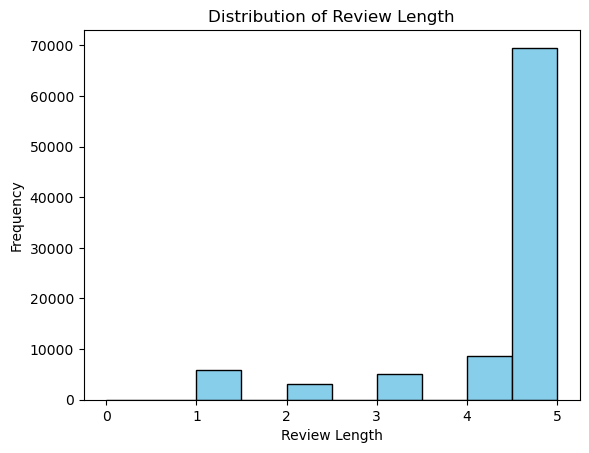

In [21]:
plt.hist(data['rating'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Length')

# Show plot
plt.show()

In [48]:
len(data[data['rating'] > 4]) / len(data)

0.7539290866297168

In [50]:
quantiles = data[data['rating'] <= 4]['text'].apply(len).quantile([0.1, 0.5, 0.9])

print("25th percentile (Q1):", quantiles[0.1])
print("50th percentile (median):", quantiles[0.5])
print("75th percentile (Q3):", quantiles[0.9])

25th percentile (Q1): 120.0
50th percentile (median): 323.0
75th percentile (Q3): 855.0


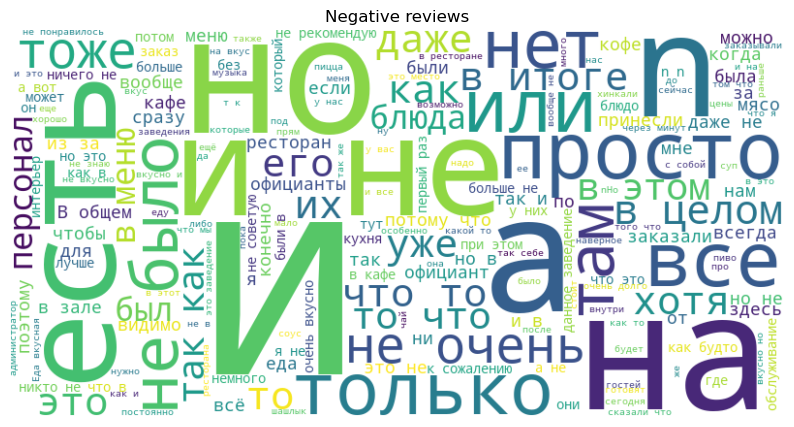

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plÍt

# Assuming your DataFrame is named 'df' and the column containing stemmed text is named 'stemmed_text'
text = ' '.join(data[data['rating'] <= 4]['text'])  # Concatenate all text from the column into a single string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Negative reviews')
plt.show()

In [33]:
data

,Unnamed: 0,addres,name,rating,rubics,text,review_length
6,6,"Воронежская область, Богучарский район, М-4 До...",У тещи,4.0,[Кафе],Глубинка страны во всех своих проявлениях. Асс...,490
8,8,"Москва, 4-й Кожевнический переулок, 4",Jinju,5.0,"[Кафе, Кофейня]","5 из 5🖤 Пил кофе и в Риме, и в Париже, но вку...",270
9,9,"Москва, 4-й Кожевнический переулок, 4",Jinju,4.0,"[Кафе, Кофейня]","Не очень удобное расположение, от метро идти м...",214
13,13,"Краснодарский край, городской округ Сочи, посё...",Пандок,2.0,[Ресторан],"Самый большой плюс это месторасположение, набе...",485
14,14,"Краснодарский край, городской округ Сочи, посё...",Пандок,5.0,[Ресторан],Добрый день! Сегодня во второй раз посетили с ...,482
...,...,...,...,...,...,...,...
499014,499983,"Севастополь, проспект Генерала Острякова, 155В",Кочерга,5.0,"[Кафе, Банкетный зал]","Вкуснейшая еда, отличный персонал, ребята моло...",62
499016,499985,"Москва, Братиславская улица, 31, корп. 1",Шаурма 1001,1.0,"[Быстрое питание, Кафе]","Залетели ночью с друзьями, разбудили работника...",167
499019,499988,"Москва, улица Юных Ленинцев, 52",Petruccio. Pizza&Pasta,5.0,"[Ресторан, Кафе, Пиццерия]",Очень вкусная пицца. Нравится их система лояль...,133
499020,499989,"Москва, улица Юных Ленинцев, 52",Petruccio. Pizza&Pasta,5.0,"[Ресторан, Кафе, Пиццерия]","Пицца детям понравилась, интерьер очень интере...",149


In [131]:
stop_words = get_stop_words('russian')
def remove_russian_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Step 1: Remove punctuation from the text column
data['text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

# Step 2: Remove stop words from the text column
data['text'] = data['text'].apply(remove_russian_stop_words)

In [132]:
mystem = Mystem()

# Function to apply stemming to Russian text
def stem_russian_text(text):
    tokens = mystem.lemmatize(text)
    return ''.join(tokens)

# Apply stemming to the text column
data['text'] = data['text'].apply(stem_russian_text)

In [133]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])

In [153]:
data["target"] = data['rating'].apply(lambda x: x > 4)

len(data[data['target'] == False])/len(data)

0.2460709133702832

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, data['target'], test_size=0.3, random_state=42)

In [159]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [160]:
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8738973246565438


In [161]:
print(classification_report(y_test, y_pred, target_names=["Not 5 star", "5 star"]))

              precision    recall  f1-score   support

  Not 5 star       0.95      0.51      0.66      6720
      5 star       0.86      0.99      0.92     20940

    accuracy                           0.87     27660
   macro avg       0.91      0.75      0.79     27660
weighted avg       0.88      0.87      0.86     27660



In [186]:
learn_data = df[df['rubics'].apply(lambda x: 'Кафе' in x or 'Ресторан' in x)]
learn_data = learn_data[['rating', 'text']]
learn_data

,rating,text
6,4.0,Глубинка страны во всех своих проявлениях. Асс...
8,5.0,"5 из 5🖤 Пил кофе и в Риме, и в Париже, но вку..."
9,4.0,"Не очень удобное расположение, от метро идти м..."
13,2.0,"Самый большой плюс это месторасположение, набе..."
14,5.0,Добрый день! Сегодня во второй раз посетили с ...
...,...,...
499014,5.0,"Вкуснейшая еда, отличный персонал, ребята моло..."
499016,1.0,"Залетели ночью с друзьями, разбудили работника..."
499019,5.0,Очень вкусная пицца. Нравится их система лояль...
499020,5.0,"Пицца детям понравилась, интерьер очень интере..."


In [187]:
data_train, data_test = train_test_split(learn_data, test_size=0.3, random_state=42)

In [188]:
data_train_filename = join(os.environ["HOME"], "Datasets/yandex_data_train.csv")
data_train.to_csv(data_train_filename)

In [189]:
data_test_filename = join(os.environ["HOME"], "Datasets/yandex_data_for_llm.csv")
data_test.to_csv(data_test_filename)

In [232]:
quantiles = data_train['text'].apply(len).quantile([0.1, 0.5, 0.9])

print("25th percentile (Q1):", quantiles[0.1])
print("50th percentile (median):", quantiles[0.5])
print("75th percentile (Q3):", quantiles[0.9])

25th percentile (Q1): 89.0
50th percentile (median): 206.0
75th percentile (Q3): 557.0


In [233]:
quantiles = data_test['text'].apply(len).quantile([0.1, 0.5, 0.9])

print("25th percentile (Q1):", quantiles[0.1])
print("50th percentile (median):", quantiles[0.5])
print("75th percentile (Q3):", quantiles[0.9])

25th percentile (Q1): 89.0
50th percentile (median): 205.0
75th percentile (Q3): 547.0


In [237]:
len(data_test[data_test['rating'] > 4])/len(data_test)

0.7570498915401301

In [238]:
len(data_train[data_train['rating'] > 4])/len(data_train)

0.7525915366378977